# Lab | Handling Data Imbalance in Classification Models

For this lab and in the next lessons we will build a model on customer churn binary classification problem. You will be using files_for_lab/Customer-Churn.csv file.

### Scenario

You are working as an analyst with this internet service provider. You are provided with this historical data about your company's customers and their churn trends. Your task is to build a machine learning model that will help the company identify customers that are more likely to default/churn and thus prevent losses from such customers.

### Instructions

In this lab, we will first take a look at the degree of imbalance in the data and correct it using the techniques we learned on the class.

Here is the list of steps to be followed (building a simple model without balancing the data):


   * Import the required libraries and modules that you would need.
   * Read that data into Python and call the dataframe `churnData`.
   * Check the datatypes of all the columns in the data. You would see that the column `TotalCharges` is object type. Convert this column into numeric type using pd.to_numeric function.
  * Check for null values in the dataframe. Replace the null values.
  * Use the following features: `tenure`, `SeniorCitizen`, `MonthlyCharges` and `TotalCharges`:
       * Scale the features either by using normalizer or a standard scaler.
       * Split the data into a training set and a test set.
       * Fit a logistic regression model on the training data.
       * Check the accuracy on the test data.
       
Note: So far we have not balanced the data.

Managing imbalance in the dataset

  *  Check for the imbalance.
  *  Use the resampling strategies used in class for upsampling and downsampling to create a balance between the two classes.
  *  Each time fit the model and see how the accuracy of the model is.

# Importing Basic Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# loading the data
churnData = pd.read_csv("files_for_lab/Customer-Churn.csv")
churnData

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,No,Yes,Yes,No,Yes,Yes,One year,103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,Yes,No,No,No,No,No,Month-to-month,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,No,No,No,No,No,No,Month-to-month,74.40,306.6,Yes


## EDA

In [3]:
# checking data types

churnData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   OnlineSecurity    7043 non-null   object 
 7   OnlineBackup      7043 non-null   object 
 8   DeviceProtection  7043 non-null   object 
 9   TechSupport       7043 non-null   object 
 10  StreamingTV       7043 non-null   object 
 11  StreamingMovies   7043 non-null   object 
 12  Contract          7043 non-null   object 
 13  MonthlyCharges    7043 non-null   float64
 14  TotalCharges      7043 non-null   object 
 15  Churn             7043 non-null   object 
dtypes: float64(1), int64(2), object(13)
memory

In [4]:
# checking a bit more the total charges feature

churnData.TotalCharges.value_counts()

          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6531, dtype: int64

In [5]:
# changing datatype from object to numeric

churnData["TotalCharges"] = pd.to_numeric(churnData.TotalCharges, errors ='coerce')

### Null Values

In [6]:
churnData.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [7]:
churnData['TotalCharges'].isna().sum() / len(churnData)

# since the nans represent such a small percentage we can just replace them with the mean 
# without really affecting datapoint distribution too much.

0.001561834445548772

In [8]:
# we replace nans here
churnData['TotalCharges'] = churnData['TotalCharges'].replace(np.nan, churnData['TotalCharges'].mean())

In [9]:
# sanity check
churnData.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## Fearture Selection & Train/Test Split

In [10]:
features = ['tenure', 'SeniorCitizen', 'MonthlyCharges', 'TotalCharges']

X = pd.DataFrame(data=churnData, columns=features)
y = pd.DataFrame(data=churnData, columns=['Churn'])

In [11]:
X.head(), y.head() # sanity check

(   tenure  SeniorCitizen  MonthlyCharges  TotalCharges
 0       1              0           29.85         29.85
 1      34              0           56.95       1889.50
 2       2              0           53.85        108.15
 3      45              0           42.30       1840.75
 4       2              0           70.70        151.65,
   Churn
 0    No
 1    No
 2   Yes
 3    No
 4   Yes)

In [12]:
# encoding y

from sklearn import preprocessing

encoder = preprocessing.LabelEncoder()
y = encoder.fit_transform(y)

C:\Users\lazar\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [13]:
# train test split

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.20, random_state = 42)

## Logistic Regression

In [14]:
# creating function for scaling and modeling

def model(scaler, model, X_train, X_test, y_train, y_test):
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    model.fit(X_train,y_train)
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    print("Accuracy on train set: ", round(accuracy_score(y_train, pred_train),4))
    print("Accuracy on test set: ", round(accuracy_score(y_test, pred_test),4))
    print("F1 on train set: ", round(f1_score(y_train, pred_train),4))
    print("F1 on test set: ", round(f1_score(y_test, pred_test),4))

In [15]:
# importing necessary libraries

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,f1_score

LogReg = LogisticRegression()
scaler = StandardScaler()

model(scaler, LogReg, X_train, X_test, y_train, y_test)

Accuracy on train set:  0.7875
Accuracy on test set:  0.8077
F1 on train set:  0.5256
F1 on test set:  0.5692


**Comment:** Accuracy on test data is roughly 80%, with low F1 scores. This model is also slightly underfitting which would indicate that this basic logistic regression model might be slghtly too simplistic for the data. This can be mitigated in multiple ways. Up until now we have kept the imbalance of the data. We focus on that next.

## Imbalance of Data

In [16]:
churnData['Churn'].value_counts(normalize=True)

No     0.73463
Yes    0.26537
Name: Churn, dtype: float64

In [17]:
# Answers for no account for about 73% of responses while for yes that's about 27% only. The target variable is clearly imbalanced.

# Oversampling: SMOTE & ADASYN

Best accuracy:  0.7977288857345636  at K  24


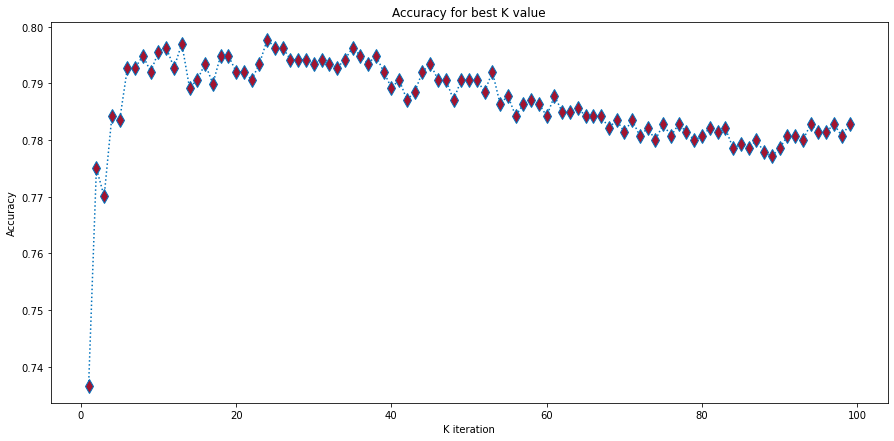

In [18]:
# since we're trying to improve the scores we have already it makes sense to find the best k_neighbor value for SMOTE.
# we'll use a kneighbor classifier to do that

from sklearn.neighbors import KNeighborsClassifier
accuracy = []

for neighbor in range(1,100):
    knn= KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    accuracy.append(accuracy_score(y_test, y_pred))
    
    
plt.figure(figsize=(15,7))
plt.plot(range(1,100), accuracy, color="#0072BD", linestyle="dotted",
         marker = "d", markerfacecolor="#A2142F", markersize=10)
plt.title("Accuracy for best K value")
plt.xlabel("K iteration")
plt.ylabel("Accuracy")
print("Best accuracy: ", max(accuracy), " at K ", accuracy.index(max(accuracy))+1)

In [19]:
# implementing SMOTE & ADASYN

from imblearn.over_sampling import SMOTE, ADASYN

smote = SMOTE(k_neighbors = 24)
X_train_SMOTE,y_train_SMOTE = smote.fit_resample(X_train,y_train)


adasyn = ADASYN(n_neighbors = 24)
X_train_ADASYN,y_train_ADASYN = adasyn.fit_resample(X_train,y_train)

In [20]:
# implementing logistic regression with SMOTE oversampling

model(scaler, LogReg, X_train_SMOTE, X_test, y_train_SMOTE, y_test)

Accuracy on train set:  0.7243
Accuracy on test set:  0.7417
F1 on train set:  0.7262
F1 on test set:  0.6078


In [21]:
# implementing logistic regression with ADASYN oversampling

model(scaler, LogReg, X_train_ADASYN, X_test, y_train_ADASYN, y_test)

Accuracy on train set:  0.6978
Accuracy on test set:  0.7303
F1 on train set:  0.7004
F1 on test set:  0.605


**Comment:** Both SMOTE and ADASYN produce accuracy scores lower than our original Logistic Regression model.

# Undersampling: TomekLinks & One Sided Selection

In [22]:
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import OneSidedSelection # uses tomeklinks to remove noisy samples

tomek = TomekLinks()
X_train_tomek, y_train_tomek = tomek.fit_resample(X_train,y_train)

oss = OneSidedSelection(random_state=0)
X_train_oss, y_train_oss = oss.fit_resample(X_train,y_train)

In [23]:
# implementing logistic regression with TomekLinks undersampling

model(scaler, LogReg, X_train_tomek, X_test, y_train_tomek, y_test)

Accuracy on train set:  0.788
Accuracy on test set:  0.7921
F1 on train set:  0.5864
F1 on test set:  0.5867


In [24]:
# implementing logistic regression with One sided selection undersampling

model(scaler, LogReg, X_train_oss, X_test, y_train_oss, y_test)

Accuracy on train set:  0.7877
Accuracy on test set:  0.7921
F1 on train set:  0.586
F1 on test set:  0.5867


**Comment:** Both undersampling techniques are performing very close to our original Logistic Regression model. Also both algorithms produce almost identical results which might indicate that the data hasn't been particularly "noisy" to begin with.

# Weighted Logistic Regression

In [33]:
from sklearn.metrics import classification_report

# getting the classification report from our baseline logistic regression model

LogReg = LogisticRegression()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
LogReg.fit(X_train,y_train)
pred_train = LogReg.predict(X_train)
pred_test = LogReg.predict(X_test)
print(classification_report(y_train, pred_train))
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86      4138
           1       0.65      0.44      0.53      1496

    accuracy                           0.79      5634
   macro avg       0.73      0.68      0.69      5634
weighted avg       0.77      0.79      0.77      5634

              precision    recall  f1-score   support

           0       0.83      0.93      0.88      1036
           1       0.70      0.48      0.57       373

    accuracy                           0.81      1409
   macro avg       0.77      0.70      0.72      1409
weighted avg       0.80      0.81      0.79      1409



In [26]:
# calculating weights for class 0 and 1
weight_0 = 5634/4138
weight_1 = 5634/1496

weight_0, weight_1

(1.361527307878202, 3.766042780748663)

In [27]:
# weighted logistic regression for balanced weights

weights = {0:1.3, 1:3.7}

LogReg_Weighted = LogisticRegression(class_weight = weights)

In [28]:
model(scaler, LogReg_Weighted, X_train, X_test, y_train, y_test)

Accuracy on train set:  0.7213
Accuracy on test set:  0.7402
F1 on train set:  0.5866
F1 on test set:  0.6131


In [46]:
# weighted logistic regression favoring class 1

weights2 = {0:1.3, 1:5}

LogReg_Weighted_2 = LogisticRegression(class_weight = weights2)

# tried some combinations of different weights

In [47]:
model(scaler, LogReg_Weighted_2, X_train, X_test, y_train, y_test)

Accuracy on train set:  0.6784
Accuracy on test set:  0.6877
F1 on train set:  0.5798
F1 on test set:  0.5985


**Comment:** After finding the class weights of the target variable our new weighted model actually underperforms in terms of accuracy compared to our baseline logistic regression model. This means that undersampling techniques and our baseline logistic regression perform the best in terms of accuracy. Sometimes less *is* more.